<a href="https://colab.research.google.com/github/LeratoMatlala1/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales


Author: Lerato Matlala

## Project Overview

## Load and Inspect Data

***Import Libraries***

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


***Loading the data from path***

In [80]:
filepath = '/content/drive/MyDrive/Coding Dojo/Week 2/Assignments/sales_predictions_2023.csv'

Salesdf = pd.read_csv(filepath)

#Display top 5 rows of the dataframe
Salesdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
#Print summary information about the dataframe
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

***1) How many rows and columns?***

In [82]:
Salesdf.shape

(8523, 12)

- There are 8523 rows and 12 colums in the dataframe

***2) What are the datatypes of each variable?***



In [83]:
Salesdf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

***3) Are there duplicates? If so, drop any duplicates.***

In [84]:
Salesdf.duplicated().sum()

0

- There are no duplicates in the data



***4) Identify missing values.***

In [85]:
Salesdf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are missing values in the Item_Weight and Outlet_Size columns

***5) Address the missing values by using a placeholder value.***

In [86]:
Salesdf['Outlet_Size']= Salesdf['Outlet_Size'].fillna('Missing')
Salesdf['Item_Weight'] = Salesdf['Item_Weight'].fillna(0)

***6) Confirm that there are no missing values after addressing them.***

In [87]:
Salesdf.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

***7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).***

In [88]:
#First determine the categorical columns
CatColumns = Salesdf.select_dtypes(object).columns
CatColumns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [89]:
#determinine the unique values in the categorical columns
Salesdf[CatColumns].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [90]:
#display the values for all categoriavl columns except for Item_Identifier as it has a lot of values
CatColumns = Salesdf.select_dtypes(object).columns.drop('Item_Identifier')

for i in CatColumns:
    print(f'Value counts for {i}')
    print(Salesdf[i].value_counts())
    print('\n')

Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value counts for Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932


- Item_Fat_Content has inconsitent values:'LF', 'reg', 'low fat'


In [91]:
#replacing the inconsistent values with the correct values
Salesdf['Item_Fat_Content'] = Salesdf['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
Salesdf['Item_Fat_Content'] = Salesdf['Item_Fat_Content'].replace('reg','Regular')

In [92]:
#Checking if the values have been fixed
Salesdf['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

***8) For any numerical columns, obtain the summary statistics of each (min, max, mean).***

In [93]:
#Get all numeric columns
NumColumns = Salesdf.select_dtypes('number').columns
NumColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [94]:
#show summary statistics for the numeric columns
Salesdf[NumColumns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

### Univariate Analysis

#### Histograms

Using Seaborn to plot the histograms for each numerical feature in the data

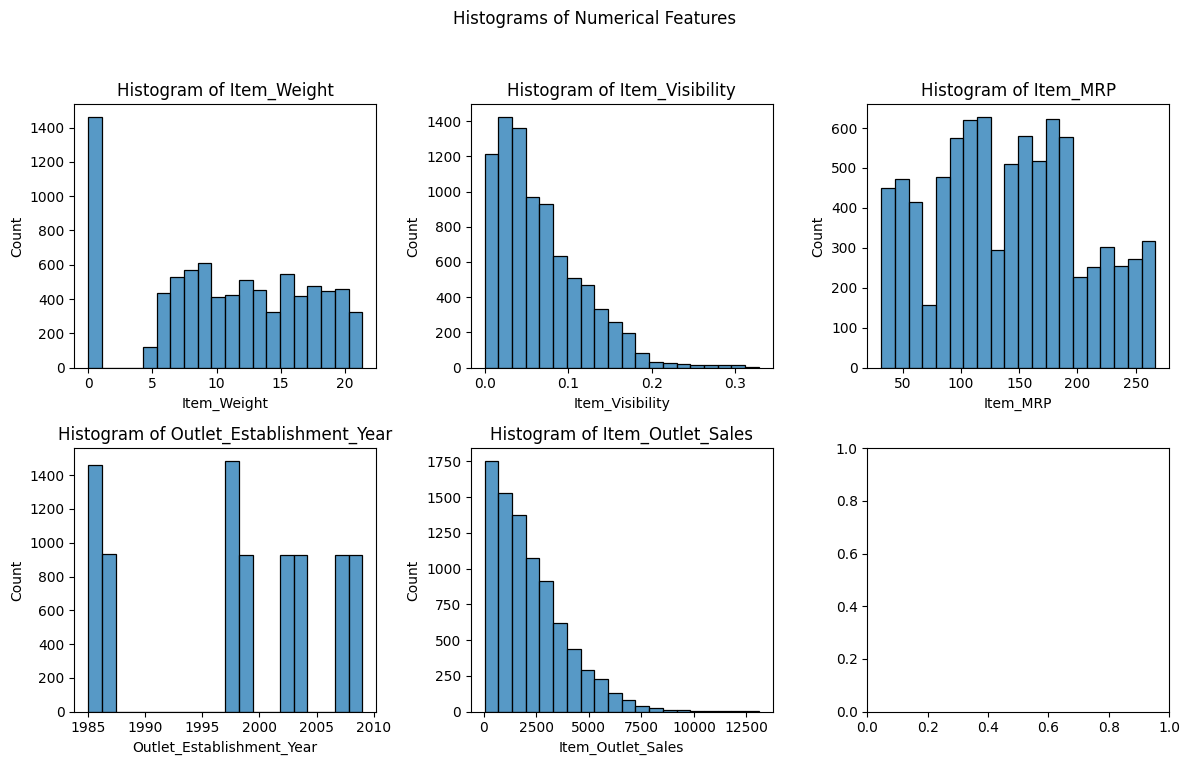

In [95]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting histograms for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=Salesdf, x=feature, bins=20,  ax=ax[row, col])
    ax[row, col].set_title(f"Histogram of {feature}")

plt.suptitle("Histograms of Numerical Features")

# Adjusting the layout to avoid overlap of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

#### Boxplots

Creating boxplots to view statistical summaries of numerical features

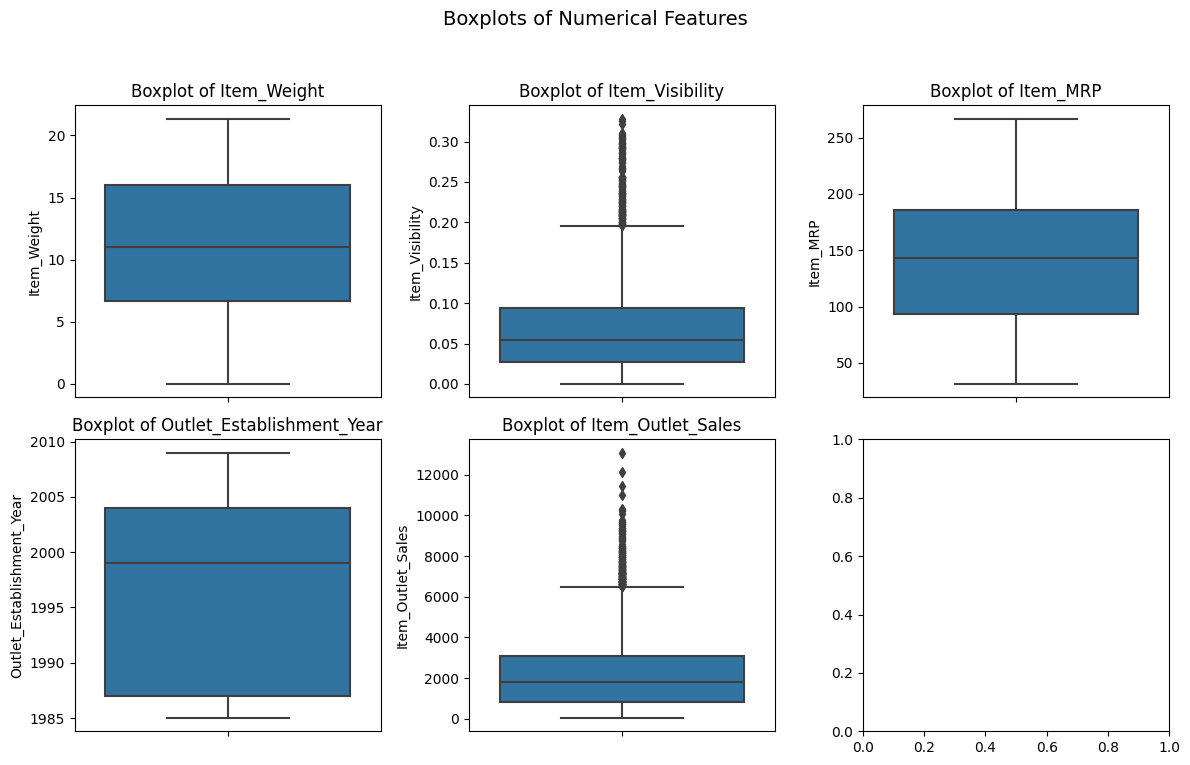

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plotting boxplots for each numerical feature on its own subplot using Seaborn
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=Salesdf, y=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {feature}")

plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


#### Countplots

Creating counplots to analyse the distribution of categorical features

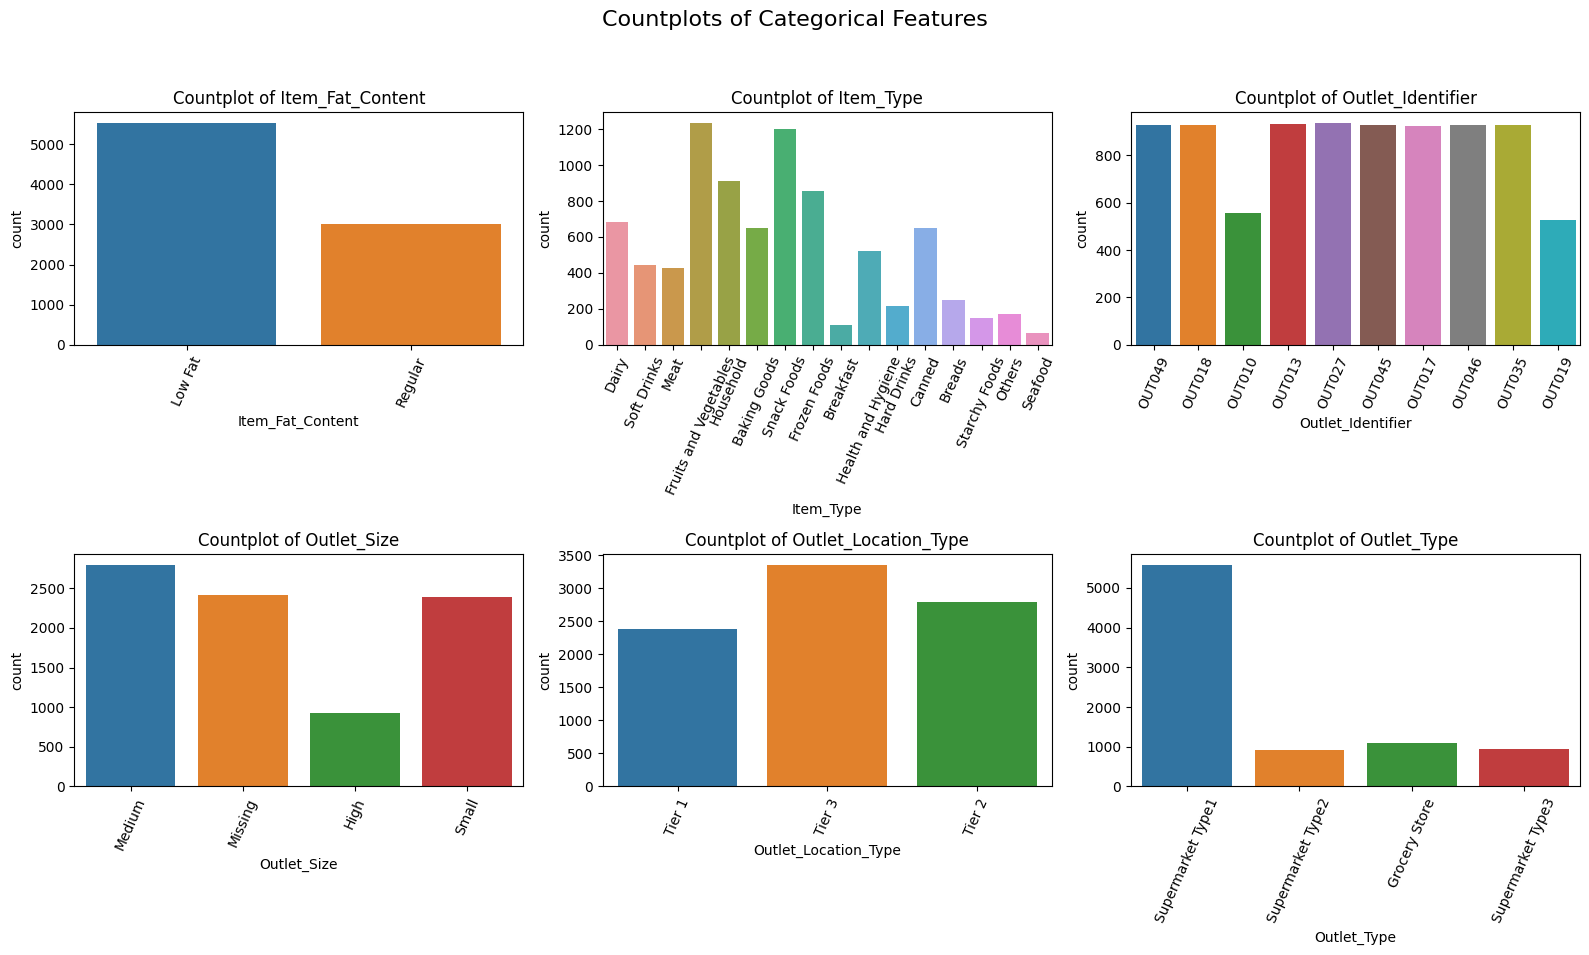

In [97]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Plotting countplots for each categorical feature on its own subplot using Seaborn
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(data=Salesdf, x=feature, ax=axes[row, col])
    axes[row, col].set_title(f"Countplot of {feature}")
    axes[row, col].tick_params(axis='x', rotation=66)

plt.suptitle("Countplots of Categorical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);


### Multivariate Analysis

#### Correlation Heatmap

Creating a correlation heatmap to visualize the pairwise correlation between the numerical features

<ipython-input-98-38fb966f9e89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Salesdf.corr()


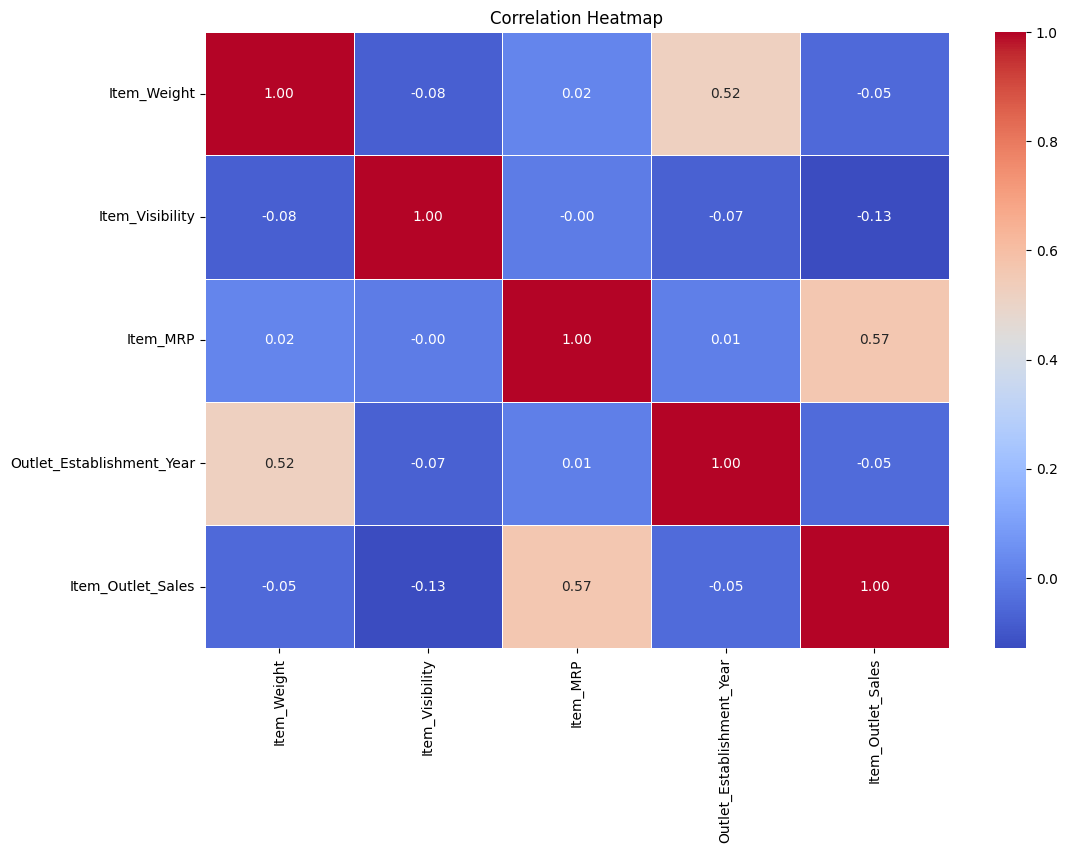

In [98]:
plt.figure(figsize=(12, 8))
correlation_matrix = Salesdf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap");

#### Regression Plots

Creating regression plots to summarise and assess the relationship between numerical features and Item Outlet Sales

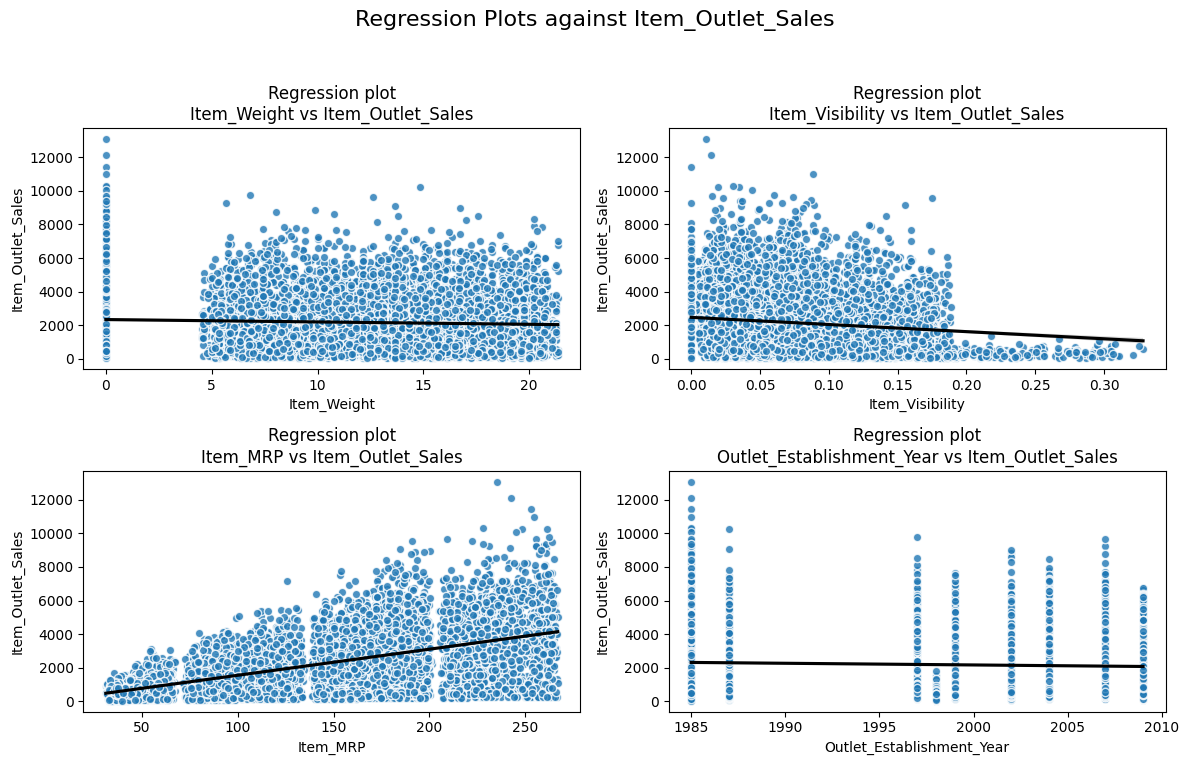

In [107]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting regression plots for each numerical feature against 'Item_Outlet_Sales'
for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.regplot(data=Salesdf, x=feature, y='Item_Outlet_Sales', ax=axes[row, col],
                line_kws={"color": "black"}, scatter_kws={"edgecolor": "white"})
    axes[row, col].set_title(f"Regression plot\n{feature} vs Item_Outlet_Sales")

plt.suptitle("Regression Plots against Item_Outlet_Sales", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);

## Explanatory Data Analysis